In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection,linear_model

In [48]:
data = pd.read_csv("C:/Users/Umair/OneDrive/Desktop/Self Projects/Study Projects/ML-For-Beginners/2-Regression/data/US-pumpkins.csv")
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [49]:
data.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [50]:
data = data[['Package', 'Low Price', 'High Price', 'Date']]
data 

,Package,Low Price,High Price,Date
0,24 inch bins,270.00,280.00,4/29/17
1,24 inch bins,270.00,280.00,5/6/17
2,24 inch bins,160.00,160.00,9/24/16
3,24 inch bins,160.00,160.00,9/24/16
4,24 inch bins,90.00,100.00,11/5/16
...,...,...,...,...
1752,22 lb cartons,14.75,14.75,9/30/16
1753,36 inch bins,275.00,275.00,9/26/16
1754,36 inch bins,275.00,275.00,9/27/16
1755,36 inch bins,275.00,275.00,9/28/16


In [51]:
averagePrice = (data["High Price"] + data["Low Price"]) / 2
month = pd.DatetimeIndex(data["Date"]).month

In [52]:
cleanedData = pd.DataFrame({"Month": month, "Package": data["Package"], "Low Price": data["Low Price"], "High Price": data["High Price"], "Average Price": averagePrice})
cleanedData = cleanedData[cleanedData["Package"].str.contains("bushel", case=True, regex=True)]
cleanedData

,Month,Package,Low Price,High Price,Average Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [53]:
cleanedData.loc[cleanedData["Package"].str.contains("1 1/9"),"Average Price"] = averagePrice / (10/9)
cleanedData.loc[cleanedData["Package"].str.contains("1/2"),"Average Price"] = averagePrice / (1/2)


<Axes: xlabel='Month', ylabel='Average Price'>

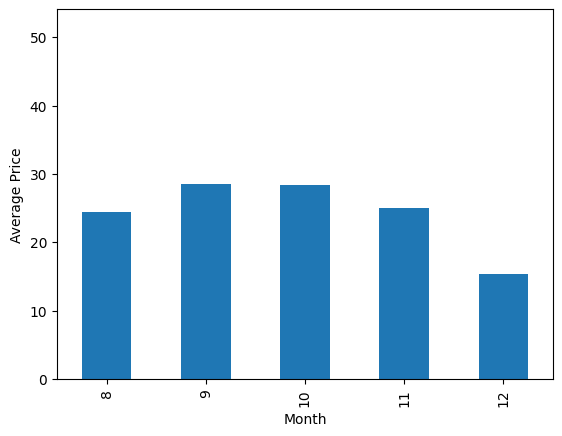

In [61]:
cleanedData.plot.scatter(x = "Month", y = "Average Price")
cleanedData.groupby("Month")["Average Price"].mean().plot(kind = "bar")